# Erste Analyse konkreter IMDb-Filmdaten

### Module importieren

In [13]:
import json
import spacy
import matplotlib.pyplot as plt
from collections import Counter

### Daten lesen
Wir können unseren gecrawlten, in eine Datei geschriebenen, Daten nun in ein Dictionary einlesen.

In [59]:
# Pfad zu JSON-Datei
PATH_TO_DATA = '../data/raw.json'
# Einlesen der JSON-Datei in Dictionary
with open(PATH_TO_DATA) as jf:
    data = json.load(jf)

Wir erhalten folgende Rohdaten:

In [62]:
data

{'Godfellas': {'synopsis': 'The film opens with three men driving in their car late at night on a highway. In the car are Henry Hill (Ray Liotta), Jimmy Conway (Robert DeNiro) and Tommy DeVito (Joe Pesci). Jimmy and Tommy are asleep when Henry hears a loud thumping noise. Trying to figure out the source of the sound, Henry suddenly realizes they need to stop and check the trunk. When they open it, we see a beaten man wrapped in several bloody tablecloths. An enraged Tommy stabs the man several times with a kitchen knife and Jimmy shoots him four times with a revolver. Henry slams the trunk lid shut and we hear a voiceover (Henry) say "As far back as I can remember, I always wanted to be a gangster." We now go back several decades, to see the events that will lead up to this scene. In the 1950s, young Henry Hill idolizes the Lucchese crime family gangsters in his blue-collar, predominantly Italian neighborhood in East New York, Brooklyn, and in 1955 quits school and goes to work for the

### Datenanalyse
Für eine erste Analyse unserer Daten können wir uns einen spezifizierten Eintrag der Datei näher anschauen.

In [67]:
# Laden des Sprach-Supports für spätere Analysen wie POS-Tagging
nlp = spacy.load("en_core_web_sm")
# Tokenisieren der Zusammenfassung des Films: Godfellas
document = nlp(data['Godfellas']['synopsis'])

Wir erhalten folgende Textdaten:

In [66]:
document

The film opens with three men driving in their car late at night on a highway. In the car are Henry Hill (Ray Liotta), Jimmy Conway (Robert DeNiro) and Tommy DeVito (Joe Pesci). Jimmy and Tommy are asleep when Henry hears a loud thumping noise. Trying to figure out the source of the sound, Henry suddenly realizes they need to stop and check the trunk. When they open it, we see a beaten man wrapped in several bloody tablecloths. An enraged Tommy stabs the man several times with a kitchen knife and Jimmy shoots him four times with a revolver. Henry slams the trunk lid shut and we hear a voiceover (Henry) say "As far back as I can remember, I always wanted to be a gangster." We now go back several decades, to see the events that will lead up to this scene. In the 1950s, young Henry Hill idolizes the Lucchese crime family gangsters in his blue-collar, predominantly Italian neighborhood in East New York, Brooklyn, and in 1955 quits school and goes to work for them. The local mob capo, Pauli

Wir können nun untersuchen, ob *spaCy* eine erfolgreiche Lemmatisierung/POS-Tagging des englischen Textes ermöglicht. Hierfür nutzen wir die bereits integrierten Tags.

In [80]:
print('TEXT\tLEMMA\tPOS\tTAG\tDEP\tSHAPE\tALPHA\tSTOP\n')
for token in document:
    print('{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}'.format(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop))

TEXT	LEMMA	POS	TAG	DEP	SHAPE	ALPHA	STOP

The	the	DET	DT	det	Xxx	True	True
film	film	NOUN	NN	nsubj	xxxx	True	False
opens	open	VERB	VBZ	ROOT	xxxx	True	False
with	with	ADP	IN	prep	xxxx	True	True
three	three	NUM	CD	nummod	xxxx	True	True
men	man	NOUN	NNS	nsubj	xxx	True	False
driving	drive	VERB	VBG	pcomp	xxxx	True	False
in	in	ADP	IN	prep	xx	True	True
their	-PRON-	DET	PRP$	poss	xxxx	True	True
car	car	NOUN	NN	pobj	xxx	True	False
late	late	ADV	RB	advmod	xxxx	True	False
at	at	ADP	IN	prep	xx	True	True
night	night	NOUN	NN	pobj	xxxx	True	False
on	on	ADP	IN	prep	xx	True	True
a	a	DET	DT	det	x	True	True
highway	highway	NOUN	NN	pobj	xxxx	True	False
.	.	PUNCT	.	punct	.	False	False
In	in	ADP	IN	prep	Xx	True	True
the	the	DET	DT	det	xxx	True	True
car	car	NOUN	NN	pobj	xxx	True	False
are	be	AUX	VBP	ROOT	xxx	True	True
Henry	Henry	PROPN	NNP	compound	Xxxxx	True	False
Hill	Hill	PROPN	NNP	attr	Xxxx	True	False
(	(	PUNCT	-LRB-	punct	(	False	False
Ray	Ray	PROPN	NNP	compound	Xxx	True	False
Liotta	Liotta	PROPN	NNP	app

Betrachten wir beispielsweise die Ausgabe des siebenten Wortes *driving*, können wir überprüfen die Funktionlität von spaCy validieren. Wir erhalten *drive* als Grundform des Wortes. Es handelt sich um ein Verb, welches kein Stoppwort darstellt. Das POS-Tagging von spaCy sieht soweit funktionsfähig aus und kann weiter verwendet werden.

Wir können nun mit einer konkreten Analyse des Textes fortfahren. Hierfür Tokenisieren wir unsere Textdaten und entfernen alle Stoppwörter, wie Satzzeichen. Diese geben uns wenige Hinweise auf den konkreten Inhalt des Films. Wir zählen ebenfalls die Häugigkeit aller Wörter und erstellen eine Liste von (Eigen-)namen für die weitere Analyse.

In [ ]:
# Reduzieren der Wortmenge auf deren Grundformen, Löschen von Stoppwörtern und Satzzeichen
words = [token.lemma_ for token in document if not token.is_stop and not token.is_punct]
# Worthäufigkeit berechnen
frequencies = Counter(words)
# Eigennamen identifizieren
entities = sorted(set(token.text for token in document.ents))

Diese Zusammenfassung enthält somit folgende Anzahl an Wörtern (reduziert):

In [58]:
len([token.text for token in document if not token.is_punct])

1698

Die gecrawlten Zusammenfassungen verschiedener Filme sollten uns somit eine gute Datenbasis für weitere Analysen bieten, insofern die Länge der aktuellen Filmbeschreibung keine Ausnahme war. 

### Datenvisualisierung
Wir können uns nun beispielsweise die 30 am häufigsten vorkommenden Wörter unserer Zusammenfassung plotten.

In [44]:
common = dict(Counter(words).most_common(30))

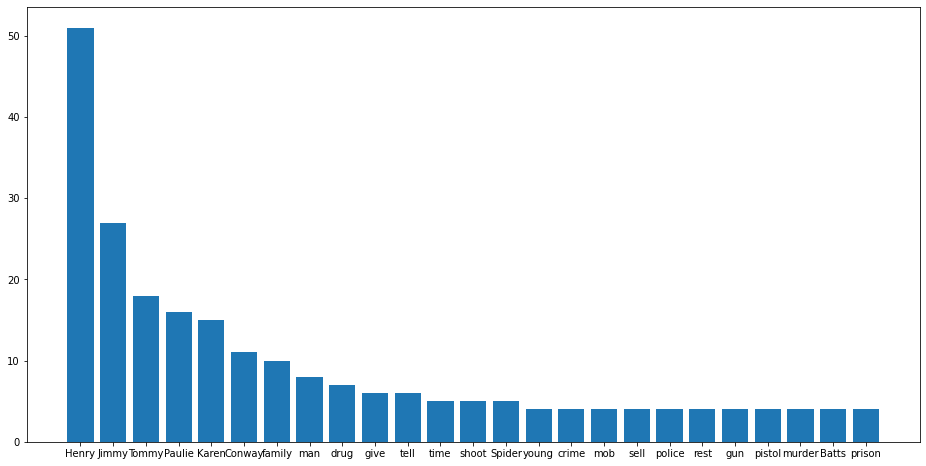

In [49]:
# Plotgröße definieren
plt.rcParams["figure.figsize"] = (16, 8)
# Bar-Plot basierend auf Dictionary erzeugen und visualisieren
plt.barh(range(len(common)), list(common.values()), tick_label=list(common.keys()))
plt.show()

Wir können erkennen, dass diese Zusammenfassung von Godfellas des öfteren die Namen der Rollen beinhaltet. Ebenfalls können wichtige Rückschlüsse auf die Handlung gezogen werden. Basierend auf der Zusammenfassung der Handlung scheint es sich bei Godfellas um ein gewaltvollen Krimi zu handeln, der sich ebenfalls mit Drogen, Morden, Schusswechsel und der Polizei auseinandersetzt. Interessanterweise kommt das Wort "Mafia" nicht unter den 25 am häufigsten verwendeten Wörtern vor. Wir können dennoch untersuchen, ob Mafia mindestens ein mal erwähnt wird. Hierfür suchen wir nach Mafia als Key in unserem frequencies-Dictionary in Groß- und Kleinschreibung:

In [50]:
frequencies['Mafia'] + frequencies['mafia']

1

Unsere Zusammenfassung enthält anscheinend nur ein mal das Wort Mafia. Wir können uns ebenfalls ein Set der verwendeten (Eigen-)namen ausgeben. Diese könnte uns weitere Rückschlüsse auf die Zeit der Handlung, Spielorte, Figuren, Darsteller und weitere wichtige Informationen bieten.

In [51]:
entities

['1955',
 '1988',
 '1996',
 '2004',
 '60,000',
 'A few nights later',
 'Air France',
 'Batts',
 'Billy Batts',
 "Billy Batts'",
 'Brooklyn',
 'Conway',
 'Copacabana',
 'De Niro',
 'DeVito',
 'Debi Mazar',
 'December 1978',
 'East New York',
 'FBI',
 'Florida',
 'Frank Vincent',
 'Gambino',
 'Gambinos',
 'Gina Mastrogiacomo',
 'Henry',
 'Henry Hill',
 'Irish',
 'Italian',
 'JFK Airport',
 'Janice',
 'Janice Rossi',
 'Jewish',
 'Jimmy',
 'Jimmy Burke',
 'Jimmy Conway',
 'Joe Pesci',
 'John F. Kennedy International Airport',
 'June 1970',
 'Karen',
 'Lois',
 'Lorraine Bracco',
 'Lucchese',
 'Lufthansa',
 'Mafia',
 'Michael Imperioli',
 'My Way',
 'Paul Sorvino',
 'Paul Vario',
 'Paulie',
 'Paulie Cicero',
 'Paulie warns Henry',
 'Pittsburgh',
 'Ray Liotta',
 'Robert DeNiro',
 'Sandy',
 'Spider',
 'Sunday, May 11th, 1980',
 'Tampa',
 'The Great Train Robbery',
 'Tommy',
 'Tommy DeVito',
 'Tuddy',
 'Witness Protection Program',
 'a few days',
 'a few thousand dollars',
 'a record $6,000,000

Es könnte sich hierbei um eine Geschichte der irischen Mafia handeln, beginnend in den 1950er Jahren. Robert de Niro und Joe Pesci scheinen eine Rolle zu verkörpern. Spielort könnte New York sein.

# Bag of Words
frequencies hier

### Erstes Fazit
Eine erste Analyse einer gecrawlten IMDb-Zusammenfassung des Filmes Godfellas mit Python und spaCy liefert einen vielversprechenden Ansatz, welcher im Folgenden weiter verfolgt wird. Im nächten Schritt soll eine Analyse aller Einträge des Crawlings untersucht werden. Hierbei ist es wichtig mit der Verarbeitung vieler Daten zu beschäftigen.